# Imports and Constants

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
DB_NAME = 'Northwind_small.sqlite'
RANDOM_STATE = 42

# Connect to Database

In [3]:
conn = sqlite3.connect(DB_NAME)

In [4]:
cur = conn.cursor()

## Get Table Names

In [5]:
q = """
    SELECT name FROM sqlite_master
    WHERE type='table'
    ORDER BY name;
    """

In [6]:
cur.execute(q)
cur.fetchall()

[('Category',),
 ('Customer',),
 ('CustomerCustomerDemo',),
 ('CustomerDemographic',),
 ('Employee',),
 ('EmployeeTerritory',),
 ('Order',),
 ('OrderDetail',),
 ('Product',),
 ('Region',),
 ('Shipper',),
 ('Supplier',),
 ('Territory',)]

**The table names do not match the provided schema.  The names in the schema are all plural, vs. singular in the actual database.**

# Review Contents of Order Details Table

The data on discounts is in this table.

In [7]:
q = """
    SELECT * FROM OrderDetail LIMIT 10;
    """

In [8]:
cur.execute(q)
cur.fetchall()

[('10248/11', 10248, 11, 14, 12, 0.0),
 ('10248/42', 10248, 42, 9.8, 10, 0.0),
 ('10248/72', 10248, 72, 34.8, 5, 0.0),
 ('10249/14', 10249, 14, 18.6, 9, 0.0),
 ('10249/51', 10249, 51, 42.4, 40, 0.0),
 ('10250/41', 10250, 41, 7.7, 10, 0.0),
 ('10250/51', 10250, 51, 42.4, 35, 0.15),
 ('10250/65', 10250, 65, 16.8, 15, 0.15),
 ('10251/22', 10251, 22, 16.8, 6, 0.05),
 ('10251/57', 10251, 57, 15.6, 15, 0.05)]

Load table into dataframe and review discount details

In [9]:
q = """
    SELECT * FROM OrderDetail;
    """

In [10]:
order_detail_df = pd.DataFrame(cur.execute(q).fetchall(), 
                               columns = [description[0] for description in cur.description])

In [11]:
order_detail_df.head()

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.0,12,0.0
1,10248/42,10248,42,9.8,10,0.0
2,10248/72,10248,72,34.8,5,0.0
3,10249/14,10249,14,18.6,9,0.0
4,10249/51,10249,51,42.4,40,0.0


## What types of discounts are there and how many of each?

In [12]:
discount_val_counts = order_detail_df.Discount.value_counts()

In [13]:
discount_val_counts

0.00    1317
0.05     185
0.10     173
0.20     161
0.15     157
0.25     154
0.03       3
0.02       2
0.01       1
0.04       1
0.06       1
Name: Discount, dtype: int64

In [14]:
discounts_given_count = len(order_detail_df) - discount_val_counts[0]
discounts_given_count

838

838 discounts were given vs. 1317 than had no discount.

Look at the value counts ordered by the discount value 

In [15]:
discount_val_counts_sorted = discount_val_counts.sort_index()

In [16]:
discount_val_counts_sorted

0.00    1317
0.01       1
0.02       2
0.03       3
0.04       1
0.05     185
0.06       1
0.10     173
0.15     157
0.20     161
0.25     154
Name: Discount, dtype: int64

## How many unique orders are in this table?

In [17]:
order_detail_df.OrderId.nunique()

830

# What is the total number of items in each order?

In [21]:
od_gb_order_id_df = order_detail_df[['OrderId', 'Quantity']].groupby('OrderId').sum()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x115ffea58>]],
      dtype=object)

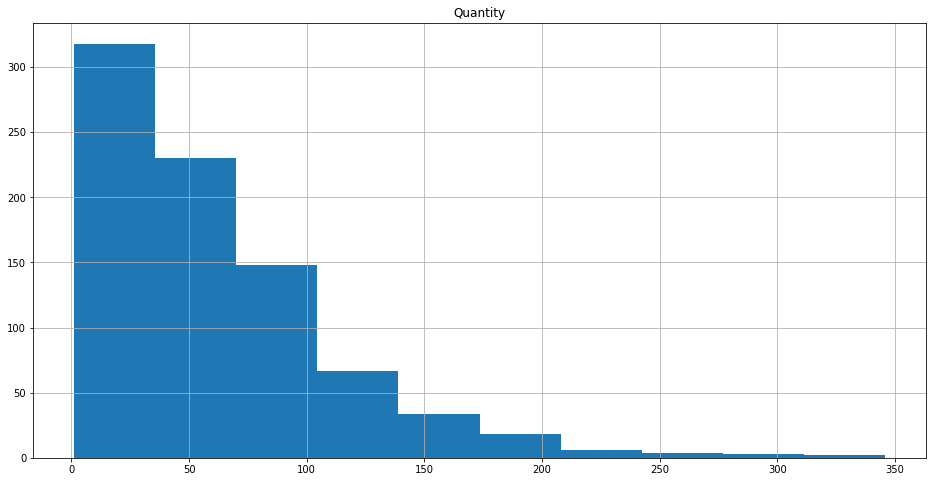

In [24]:
od_gb_order_id_df.hist(figsize=(16, 8))

In [25]:
od_gb_order_id_df['Quantity'].describe()

count    830.000000
mean      61.827711
std       50.748158
min        1.000000
25%       26.000000
50%       50.000000
75%       81.000000
max      346.000000
Name: Quantity, dtype: float64

The distribution of the quantity of items in an order is highly skewed to the right, with orders tending to be on the lower total quantity.

How many orders were for only 1 item?

In [26]:
len(od_gb_order_id_df[od_gb_order_id_df.Quantity == 1.0])

2